In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry_convert as pc
sns.set(rc={'figure.figsize':(18, 3)})

In [2]:
raw = pd.read_csv('cropMainData/ProductionCropsEAllDataNOFLAG.csv', encoding = "ISO-8859-1")

In [3]:
# extract areas, items and elements and their respective codes into separate pds
areas = raw.set_index('Area Code')[['Area']].drop_duplicates()
items = raw.set_index('Item Code')[['Item']].drop_duplicates()
elements = raw.set_index('Element Code')[['Element']].drop_duplicates()

In [4]:
# basic cleaning of raw data
raw = raw.drop(['Area Code', 'Item Code', 'Element Code', 'Unit'], axis=1) # drop the codes and unit column
raw.fillna(0, inplace=True)
#remove Y from the year
raw.columns = [name[1:] if name[0] is 'Y' else name for name in raw.columns]
raw.head()

,Area,Item,Element,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,"Almonds, with shell",Area harvested,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0,20053.0
1,Afghanistan,"Almonds, with shell",Yield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0,17161.0
2,Afghanistan,"Almonds, with shell",Production,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0,34413.0
3,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,25638.0,27582.0,25785.0
4,Afghanistan,"Anise, badian, fennel, coriander",Yield,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,7037.0,6954.0,7036.0


In [5]:
# Cleaning prices dataset
prices = pd.read_csv('prices/Prices_E_All_Data_NOFLAG.csv', encoding = "ISO-8859-1")
prices.fillna(0, inplace=True)
prices.columns = [year[1:] if year[0] is 'Y' else year for year in prices.columns]

caffeinePrices = pd.read_csv('prices/caffeine-crop-prices.csv')
caffeinePrices.fillna(0, inplace=True)
caffeinePrices = caffeinePrices[caffeinePrices['Unit']=='USD']
caffeinePrices.drop(['Domain Code', 'Domain', 'Area Code', 'Element Code', 'Year Code', 'Months Code', 'Months', 'Flag', 'Flag Description', 'Element', 'Unit'], axis=1, inplace=True)
caffeinePrices['Item'].value_counts()
caffeinePrices = caffeinePrices[caffeinePrices['Item']!='Lettuce and chicory']
caffeinePrices

def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'N/A'

# Example
caffeinePrices['continent'] = caffeinePrices['Area'].apply(lambda x: country_to_continent(x))
caffeinePrices['continent'].value_counts()

Africa           500
Asia             447
North America    426
South America    309
N/A              203
Oceania           41
Europe             4
Name: continent, dtype: int64

<Figure size 720x1440 with 0 Axes>

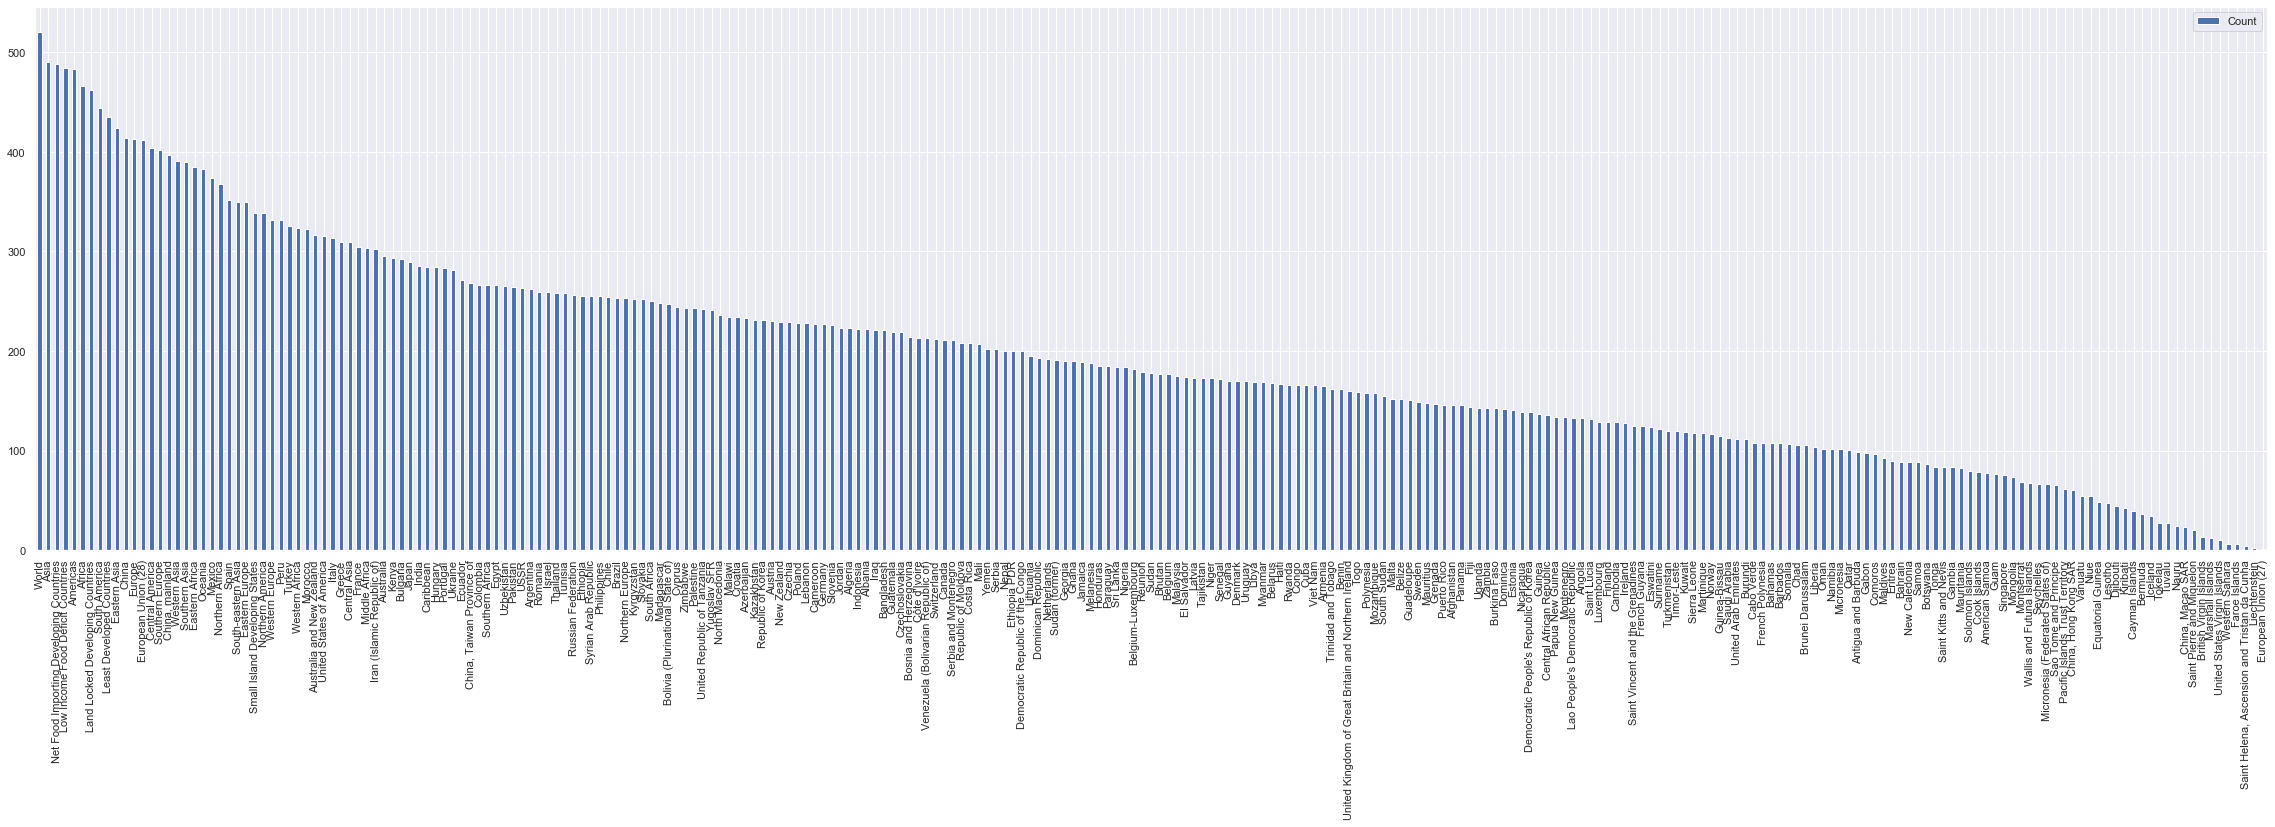

In [148]:
plt.figure(figsize=(10,20))
# sns.boxplot(raw['Area'].value_counts())

locationCounts = pd.DataFrame(raw['Area'].value_counts())
locationCounts.columns = ['Count']
locationCounts.reset_index()
locationCounts.plot.bar(figsize=(40,10))
# sns.boxplot(x=locationCounts.index, y='Count', width=0.15, data=locationCounts)    

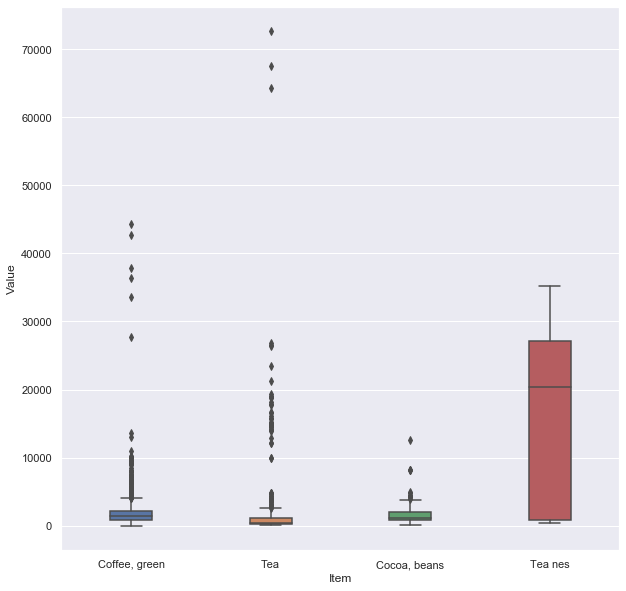

In [152]:
#distribution of prices
plt.figure(figsize=(10,10))
sns.boxplot(y='Value', x='Item',width=0.3, data=caffeinePrices)

In [6]:
# view of all areas..
pd.set_option('display.max_rows', 260)
areas.sort_index()

,Area
Area Code,
1,Armenia
2,Afghanistan
3,Albania
4,Algeria
5,American Samoa
7,Angola
8,Antigua and Barbuda
9,Argentina
10,Australia


In [7]:
# world data code is 5000
# country codes are < 5000
# continent codes are > 5000 and divisible by 100
# regions(subcontinental) codes are > 5000 and <= 5504 and not divisible by 100
# regions (other) codes are > 5504

continents = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania']
subcon_regions = ['Eastern Africa', 'Middle Africa', 'Northern Africa', 'Southern Africa', 'Western Africa',
        'Northern America', 'Central America', 'Caribbean', 'South America', 
        'Central Asia', 'Eastern Asia', 'Southern Asia', 'South-eastern Asia', 'Western Asia',
        'Eastern Europe', 'Northern Europe', 'Southern Europe', 'Western Europe', 
        'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

In [8]:
regions = ['World', 'Africa',
       'Eastern Africa', 'Middle Africa', 'Northern Africa',
       'Southern Africa', 'Western Africa', 'Americas',
       'Northern America', 'Central America', 'Caribbean',
       'South America', 'Asia', 'Central Asia', 'Eastern Asia',
       'Southern Asia', 'South-eastern Asia', 'Western Asia', 'Europe',
       'Eastern Europe', 'Northern Europe', 'Southern Europe',
       'Western Europe', 'Oceania', 'Australia and New Zealand','Melanesia', 'Micronesia', 'Polynesia']

regionalDict = {}
for region in regions:
    regionalDict[region] = raw[raw['Area']==region]
    
elements

,Element
Element Code,
5312,Area harvested
5419,Yield
5510,Production


In [9]:
world = regionalDict['World']
worldProductionTotal = world[world['Element'] == 'Production'].loc[:, '1961':]
worldYieldTotal = world[world['Element'] == 'Yield'].loc[:, '1961':]
worldAreaHarvested = world[world['Element'] == 'Area harvested'].loc[:, '1961':]

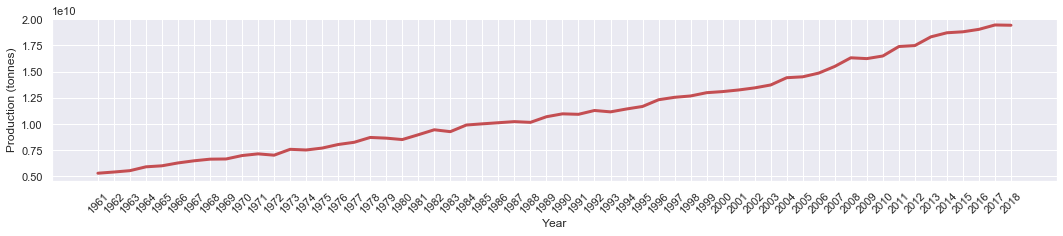

In [10]:
plt.xticks(rotation=45)
plt.plot(worldProductionTotal.sum(), label='Production', color='r', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Production (tonnes)')
plt.show()

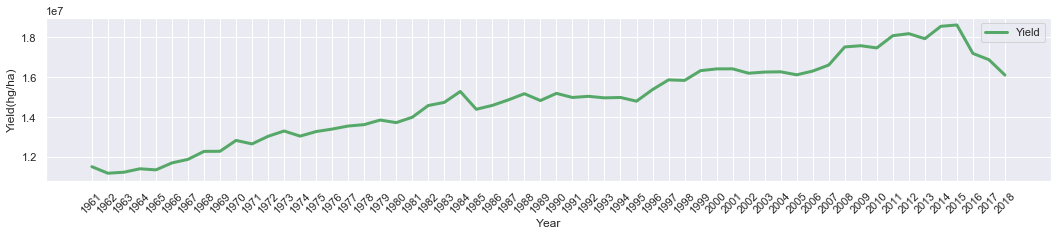

In [11]:
plt.xticks(rotation=45)
plt.plot(worldYieldTotal.sum(), label='Yield', color='g', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Yield(hg/ha)')
plt.legend()
plt.show()

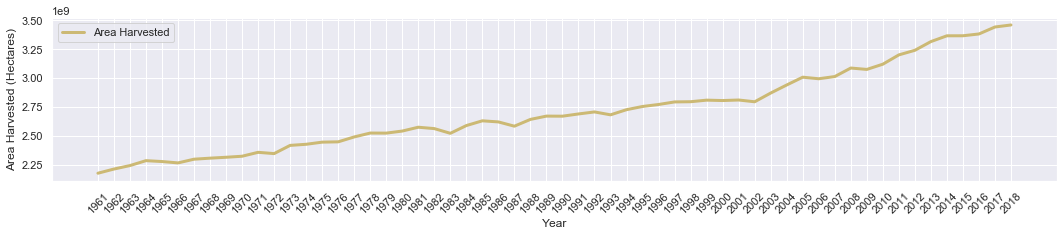

In [12]:
plt.xticks(rotation=45)
plt.plot(worldAreaHarvested.sum(), label='Area Harvested', color='y', linewidth=3, markersize=12)
plt.xlabel('Year')
plt.ylabel('Area Harvested (Hectares)')
plt.legend()
plt.show()

The best performing on average seems to be: Cereals, Total


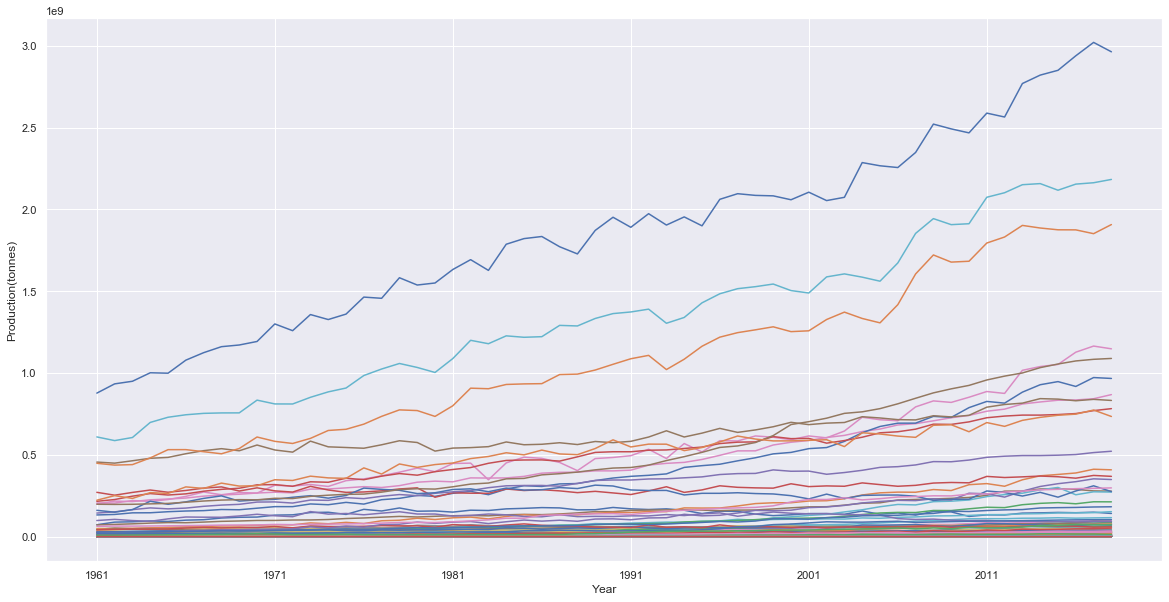

In [13]:
worldProduction = world[world['Element'] == 'Production']
worldProductionByItem = worldProduction.groupby('Item').sum().loc[:, '1961':]
# worldProductionByItem.iloc[0].plot()
for i in range(1, len(worldProductionByItem)):
    ax = worldProductionByItem.iloc[i].plot(figsize=(20, 10), label=worldProductionByItem.index[i])
    ax.set_xlabel('Year')
    ax.set_ylabel('Production(tonnes)')
print('The best performing on average seems to be: ' + worldProductionByItem.mean(axis=1).idxmax())
plt.grid(True)

## What is the correlation between climate change and crop production in countries that rank in the top 3 in Climate Risk Indexes? 

These are the countries with notably high climate risk indexes and we will be observing the ones at the top.

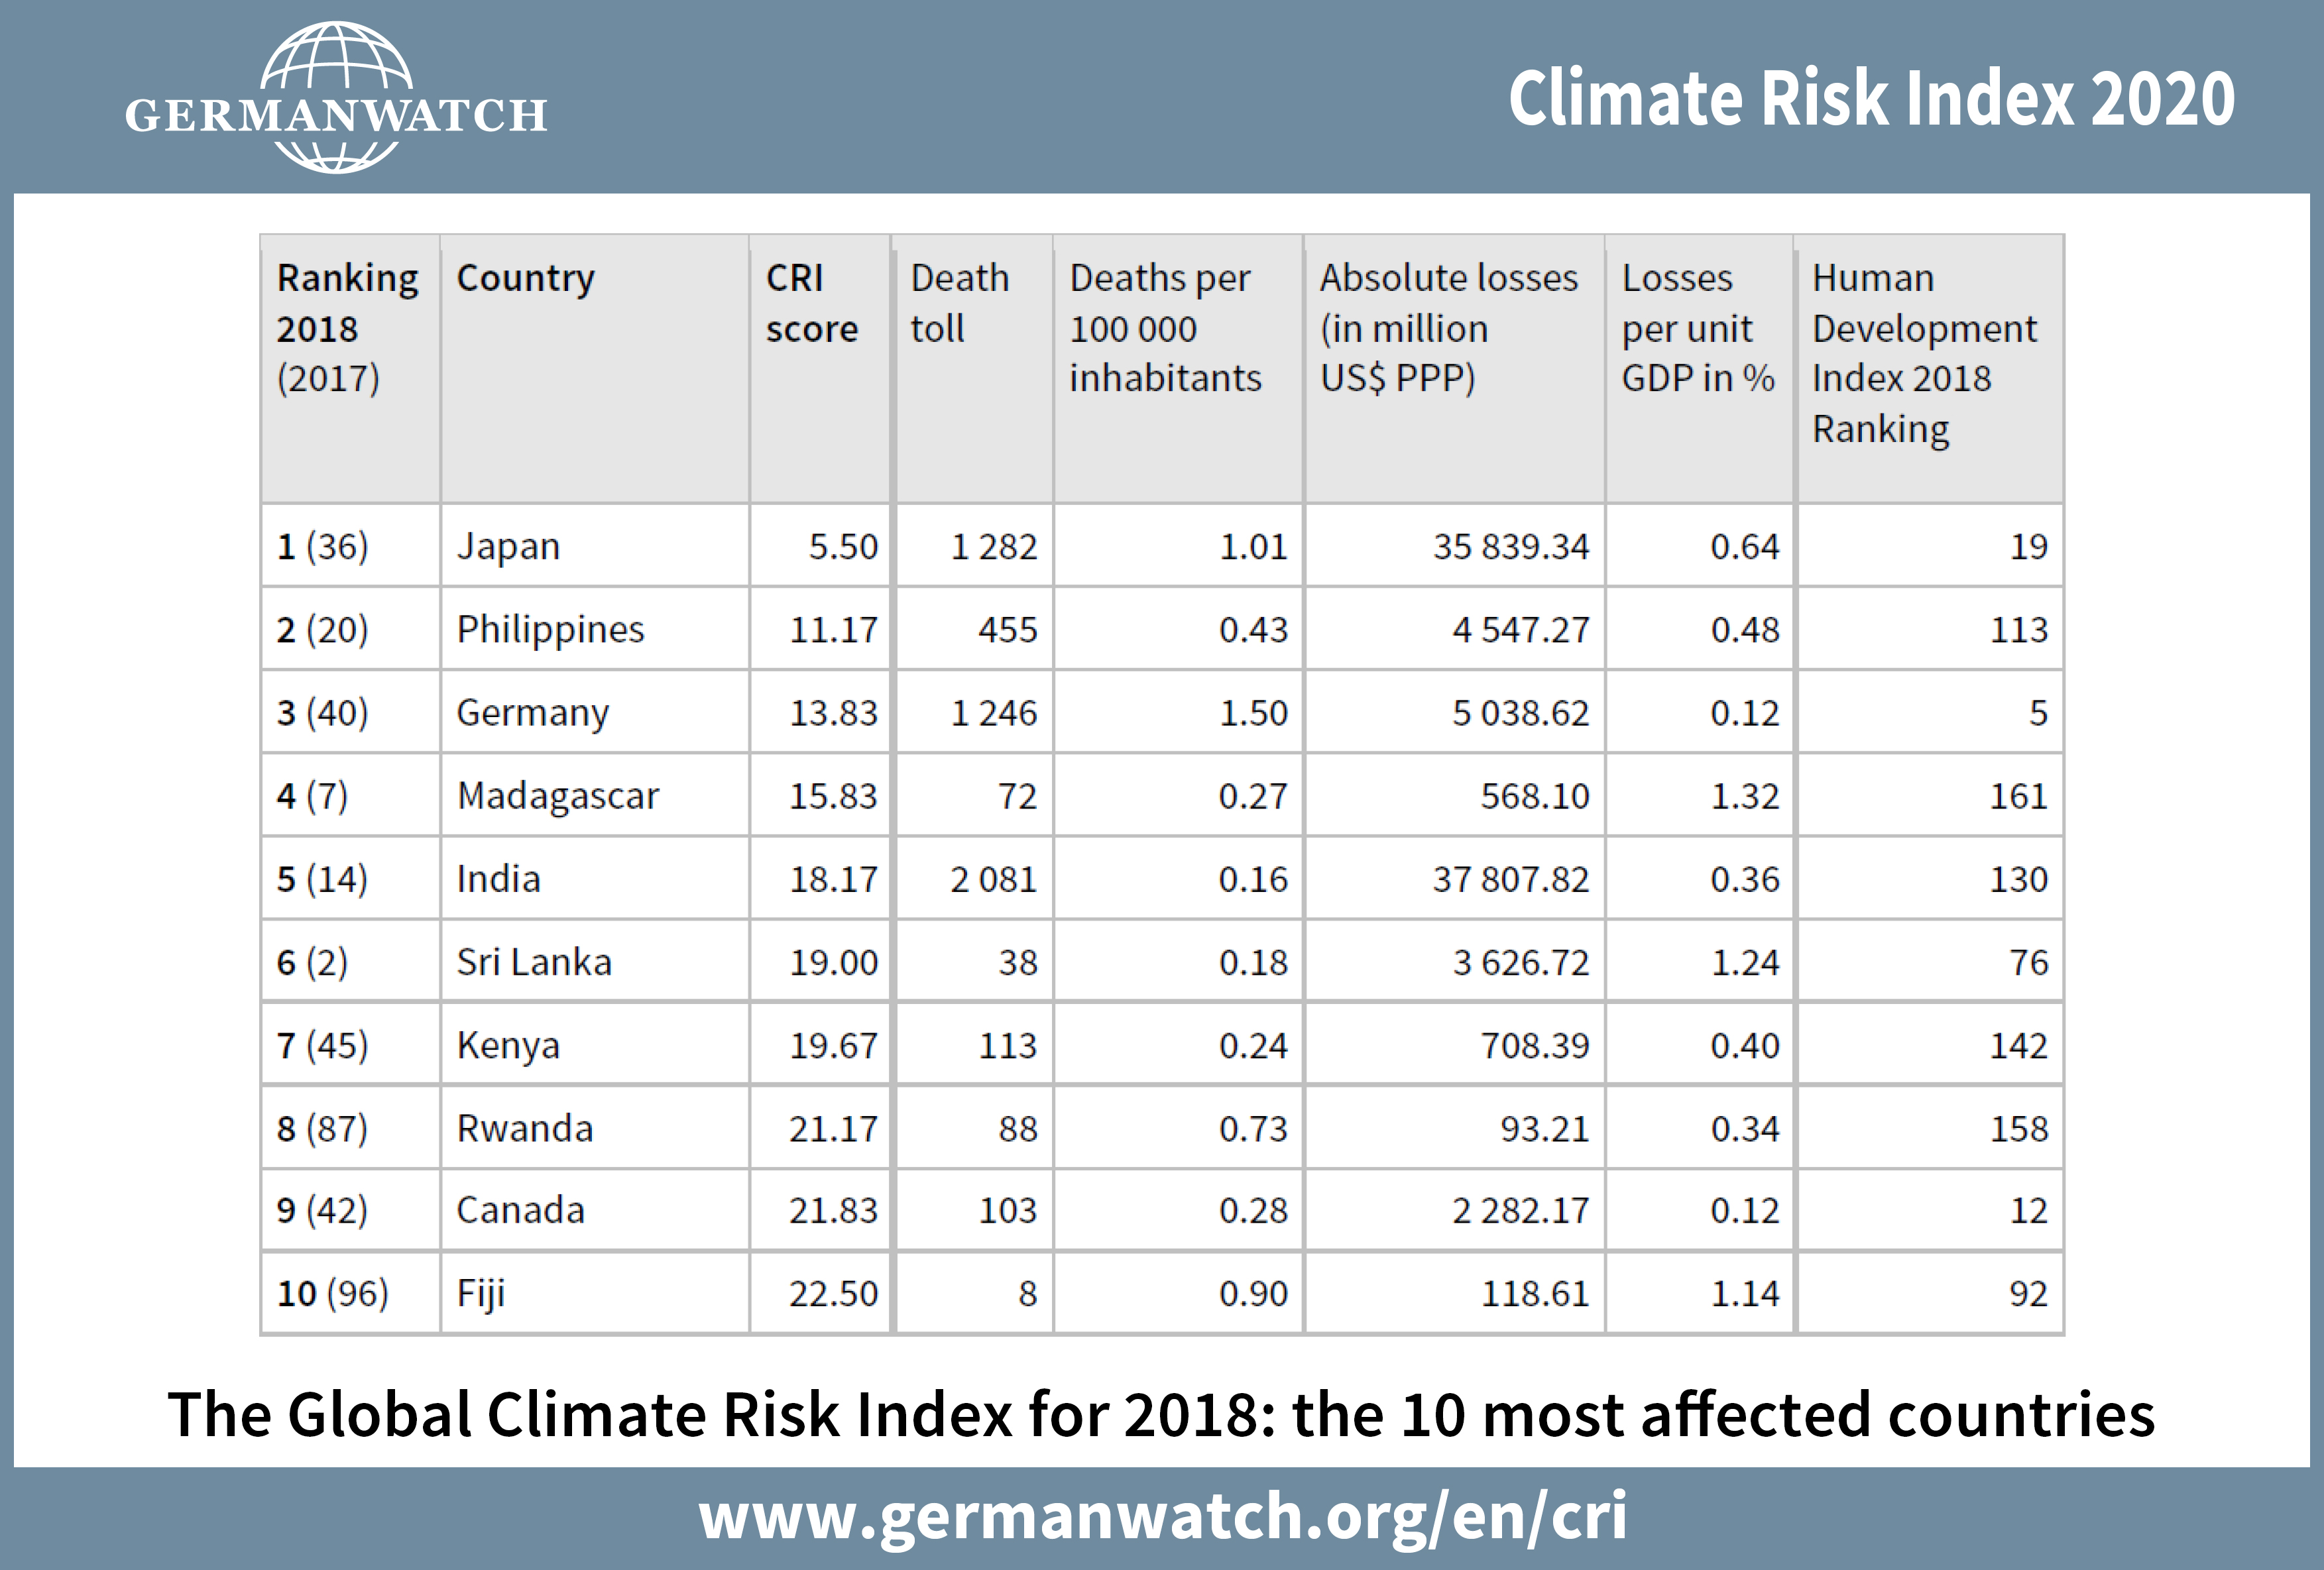

### In countries with a High Climate Risk Index, what is the correlation and does correlation actually imply causation?

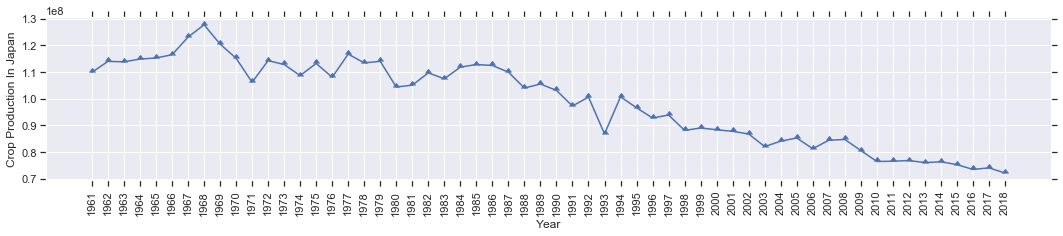

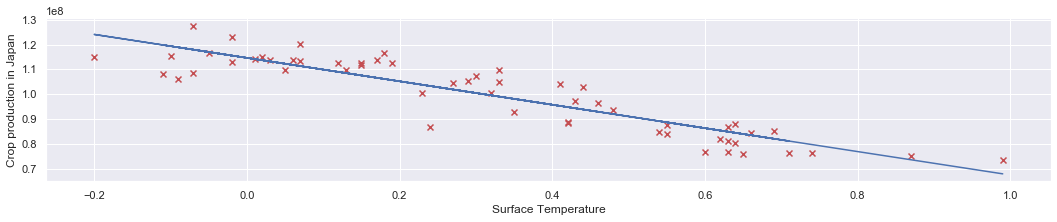

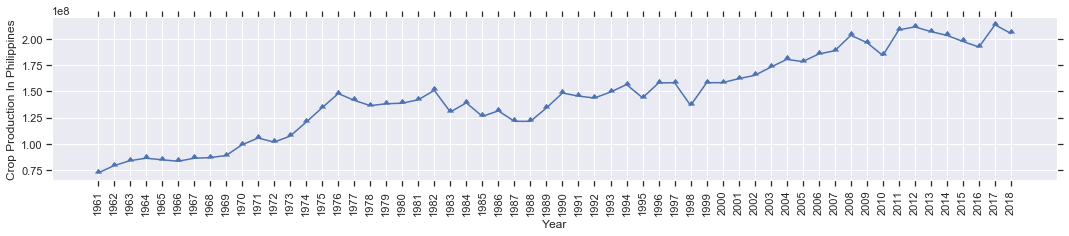

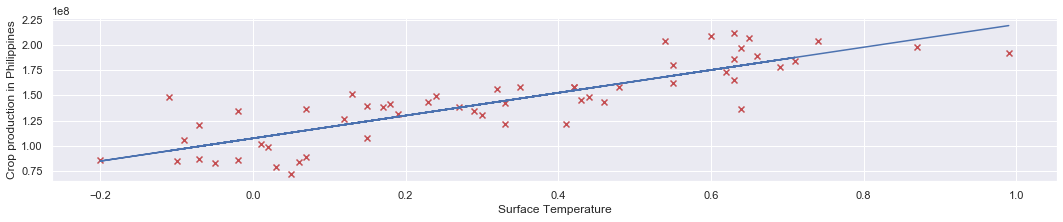

In [14]:
climate = pd.read_csv('climate/annual_csv.csv')
surfaceTemp = pd.DataFrame(climate[np.logical_and(climate['Source']=='GISTEMP', climate['Year']>=1961)].sort_values(by=['Year']))
surfaceTemp.rename({"Mean": "SurfaceTemp"}, inplace=True)
surfaceTemp['Year'] = pd.to_numeric(surfaceTemp['Year'])
surfaceTemp.drop(['Source'], axis=1, inplace=True)
surfaceTemp.set_index('Year', inplace=True)

HighCRICountries = ['Japan', 'Philippines']

for country in HighCRICountries:
    AreaAggregated = raw[raw['Area']==country]
    AreaProductionYearly = AreaAggregated[AreaAggregated['Element']=='Production'].loc[:,'1961':].sum()
    plt.plot(AreaProductionYearly, marker=10)
    plt.xlabel('Year')
    plt.ylabel('Crop Production In ' + country)
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', 
    labelbottom='on')
    plt.xticks(rotation=90)
    plt.show()

    areaFormatted = pd.DataFrame()
    count = 0
    for year, value in AreaProductionYearly.iteritems():
        areaFormatted.loc[count, 'Year'] = year
        areaFormatted.loc[count, 'Total'] = value
        count += 1
    areaFormatted['Year'] = pd.to_numeric(areaFormatted['Year'])

    areaMerged = areaFormatted.merge(surfaceTemp, on='Year')
    areaMerged.set_index('Year', inplace=True)

    plt.scatter(areaMerged['Mean'], areaMerged['Total'], marker='x', cmap='viridis_r', color='r')
    plt.xlabel('Surface Temperature')
    plt.ylabel('Crop production in ' + country)

    x = np.array(areaMerged['Mean'])
    y = np.array(areaMerged['Total'])
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)
    plt.show()

For Japan, the overall correlation is negative. But for other countries who have faced the impact of climate change, there is a weak to moderate positive correlation. Because of this, we can perhaps say, that the impact is not too apparent or there are other factors that need to be taken into account (industrial development, nature of crops grown, etc.), geographical position on the map and more.

# Studying Caffeine

1. What are the biggest sources of caffeine?

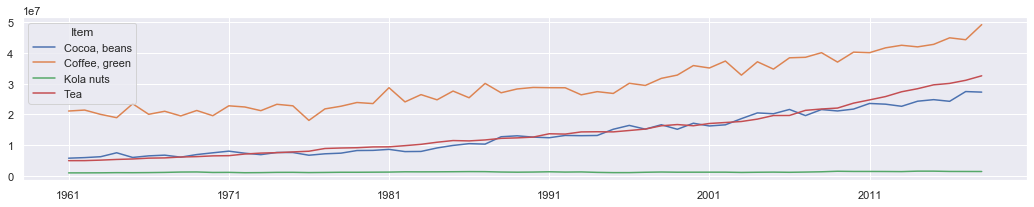

In [15]:
caffeineProduction = raw[raw['Item'].str.contains('Coffee|Tea|Cocoa|Kola')]
caffeineProduction = caffeineProduction[caffeineProduction['Element'] == 'Production']
caffeineProduction.groupby('Item').sum().loc[:,'1961':].T.plot()

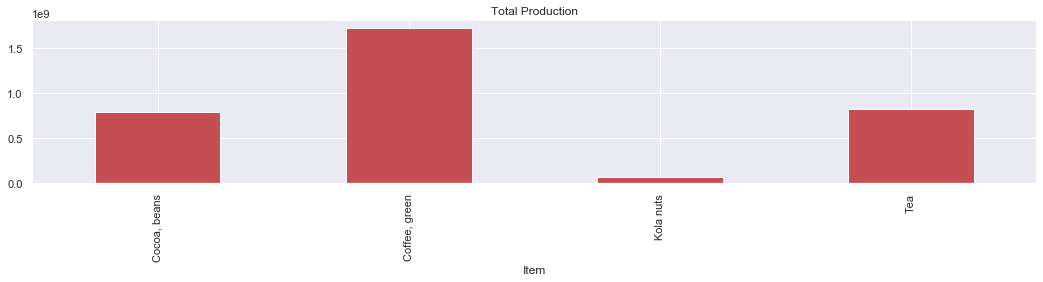

In [16]:
# Total production over the years
caffeineProduction.groupby('Item').sum().loc[:,'1961':].sum(axis=1).plot.bar(color='r')
plt.title('Total Production')
plt.show()

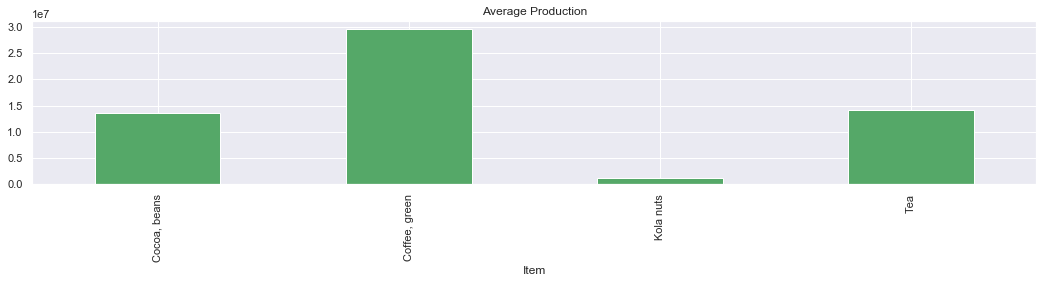

In [17]:
caffeineProduction.groupby('Item').sum().loc[:,'1961':].mean(axis=1).plot.bar(color='g')
plt.title('Average Production')
plt.show()

2. How has caffeine crop production changed over the decades, measured across Asia Pacific/Africa/Latin America and if a trend is observed for one, does that same trend apply for the others?

### Comparing sub-regionally

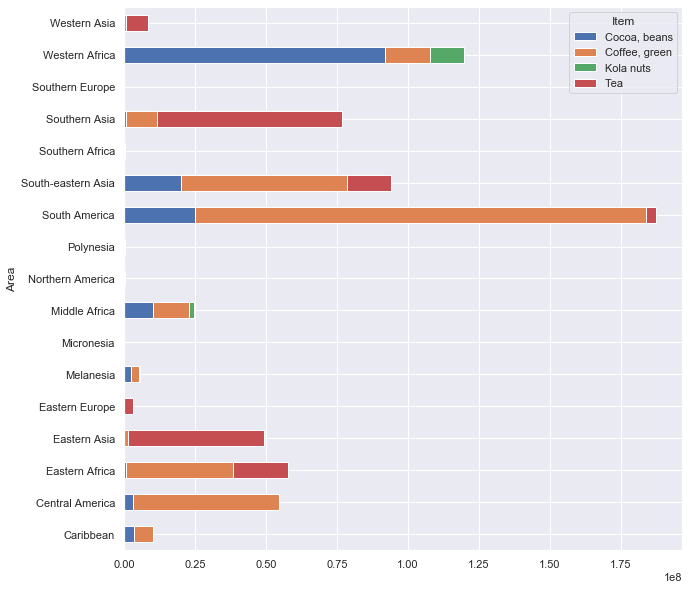

In [18]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(subcon_regions)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']

# regionsProduction.groupby('Area').sum().mean(axis=1).plot.bar()
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

South America appears to be the biggest producer of caffeine-based crops in the world and it's biggest produce is green coffee beans, astronomically higher than any other region in the world.

### Comparing continentally

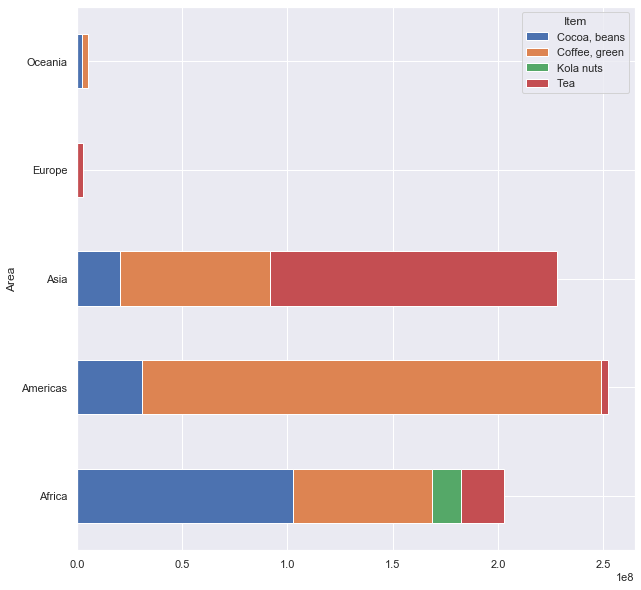

In [19]:
regionsOnly = caffeineProduction[caffeineProduction['Area'].isin(continents)]
regionsProduction = regionsOnly[regionsOnly['Element'] == 'Production']
regionsProduction.groupby(['Area', 'Item']).sum().sum(axis=1).unstack().plot.barh(stacked=True, figsize=(10,10))

Similarly, North and South America cumulatively produce the most caffeine-based crops while Asia comes close. North and South America are the biggest producers of green coffee beans, while Asia produces the most tea leaves and Africa produces the most cocoa beans. The three regions actively grow a different combination of crops and contribute differently to the global market.

## Asia, Africa, Americas (World's Biggest Manufacturers)

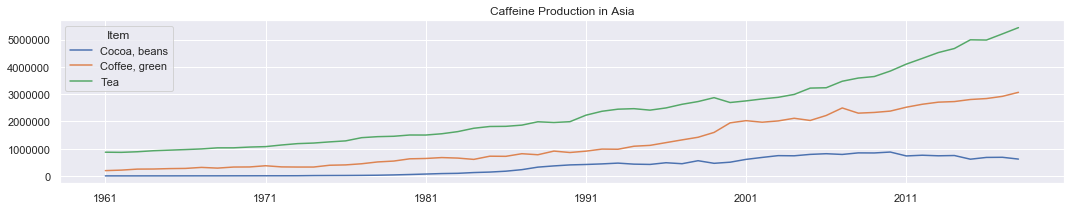

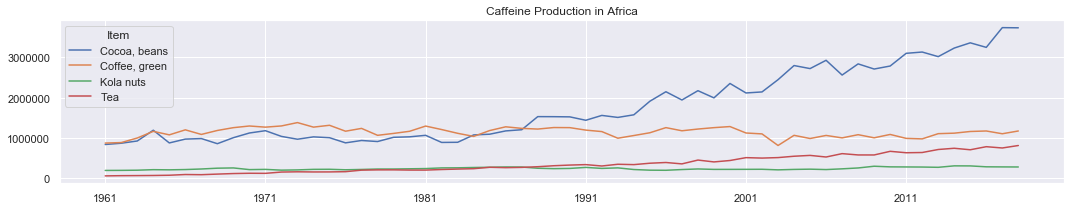

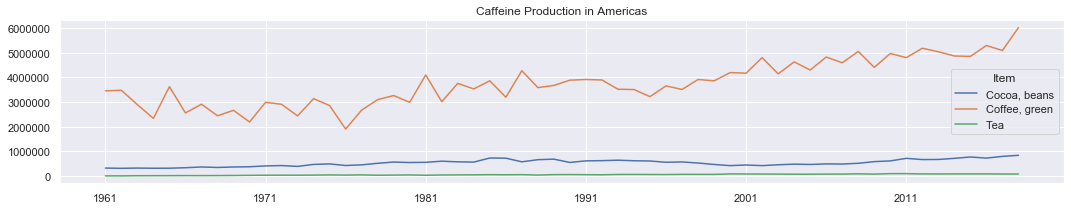

In [20]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contProduction.T.plot(title=f'Caffeine Production in {continent}')

### Understanding the trends
The takeaways from the depictions:

1) Global Production of Caffeine based crops is on an overall upward trend, even if there are mild fluctuations over the years. This can be attributed to either an increasing population, increasing demand, further cultivation of these crops, higher export rates, etc.

2) The 3 biggest sources of caffeine are cocoa beans, green coffee beans and tea leaves and each of the regions are leaders in each of these. Asia sort of ```specialises```in tea leaves, Africa in cocoa and the Americas in green coffee beans.

3) In proportion, coffee beans production in the Americas is not very stable, with sudden spikes and extreme fluctuations, the pattern being much more noticeable than the other 2 continents.

4) Asia's growth, at first sight, is the smoothest.

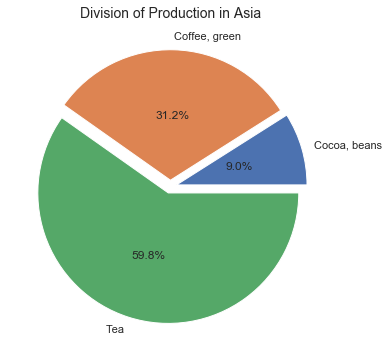

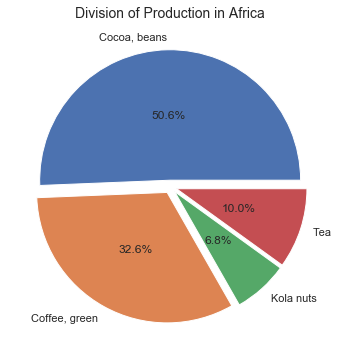

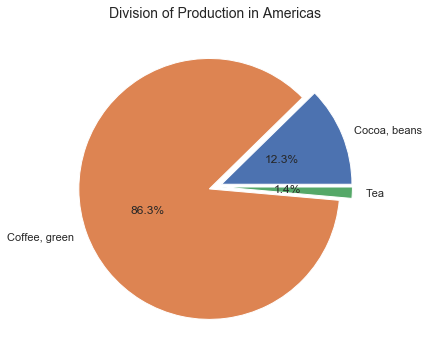

In [21]:
biggestManufacturers = ['Asia', 'Africa', 'Americas']

for continent in biggestManufacturers:
    contProduction = caffeineProduction[caffeineProduction['Area'] == continent].set_index('Item').loc[:, '1961':]
    contTotals = contProduction.sum(axis=1)
    pie, ax = plt.subplots(figsize=[10,6])
    labels = contTotals.keys()
    plt.pie(x=contTotals, autopct="%.1f%%", explode=[0.05]*len(labels), labels=labels, pctdistance=0.5)
    plt.title(f"Division of Production in {continent}", fontsize=14);

While pie charts aren't a good indication of volume, it does say something about how the market share is split and it reaffirms the points made above.

----------------------------------------------------------------------------------------------------------------------

3. How has the price of caffeine crops changed over the years in these chosen economies and is that attributed to any particular factor (a sudden introduction of an alternative, etc.)? Is there an effect of production levels on the prices of caffeine-based crops (helps to weigh their value)? When production increases or decreases, what generally happens?

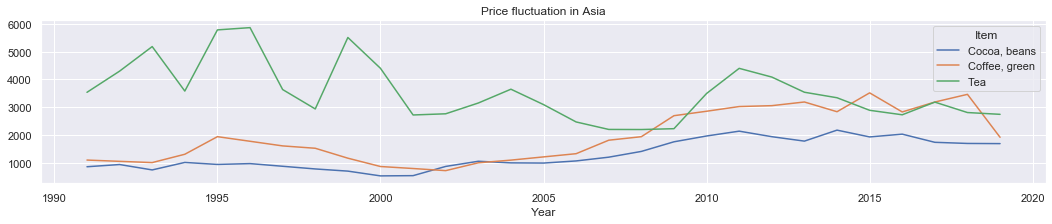

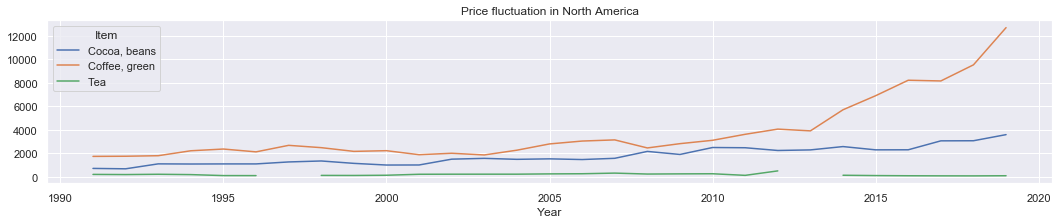

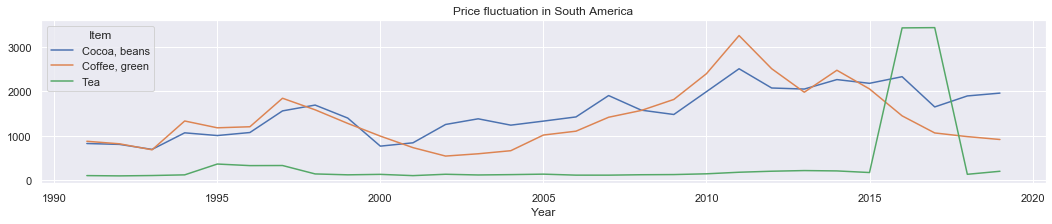

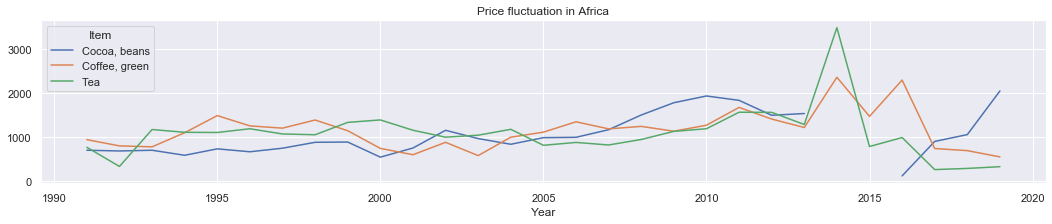

In [22]:
biggestManufacturers = ['Asia', 'North America', 'South America', 'Africa']

for continent in biggestManufacturers:
    caffeinePriceRange = caffeinePrices[caffeinePrices['continent'] == continent].set_index('Year')
    caffeinePriceRange.groupby(['Year','Item'])['Value'].mean().unstack().plot(title=f'Price fluctuation in {continent}')

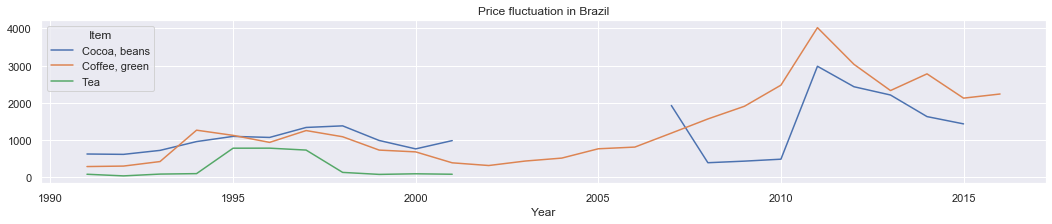

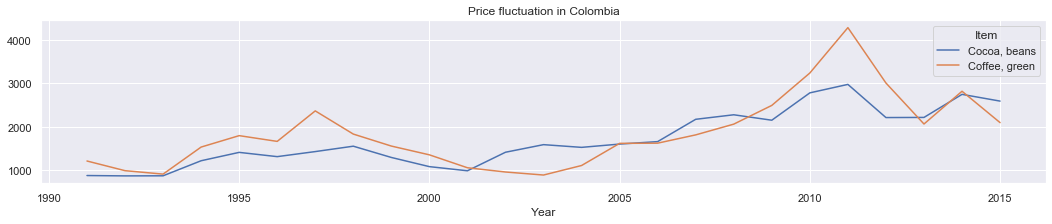

In [23]:
countries = ['Brazil', 'Colombia']
# print(caffeinePrices['Area'].value_counts())
for country in countries:
    caffeinePriceRange = caffeinePrices[caffeinePrices['Area'] == country].set_index('Year')
    caffeinePriceRange.groupby(['Year','Item'])['Value'].mean().unstack().plot(title=f'Price fluctuation in {country}')

In [32]:
caffeineSorted = caffeineProduction.groupby(['Item']).mean().T.reset_index()
priceMerge = caffeinePrices.drop(['continent', 'Item Code', 'Area'], axis=1)

caffeineSorted.columns = ['Year', 'Cocoa, beans', 'Coffee, green', 'Kola nuts', 'Tea']
caffeineSorted['Year']
caffeineSorted = pd.melt(caffeineSorted, id_vars=['Year'], value_vars=caffeineSorted.columns[1:], var_name='Item', value_name='Production')
caffeineSorted.Year = caffeineSorted.Year.astype(str)
priceMerge.Year = priceMerge.Year.astype(str)
merged = caffeineSorted.merge(priceMerge, on=['Year', 'Item'])

merged.set_index('Year')
# sns.regplot(x='Production', y='Value',data=merged)

,Item,Production,Value
Year,,,
1991,"Cocoa, beans",141940.195402,823.6
1991,"Cocoa, beans",141940.195402,619.7
1991,"Cocoa, beans",141940.195402,709.0
1991,"Cocoa, beans",141940.195402,870.1
1991,"Cocoa, beans",141940.195402,311.9
...,...,...,...
2018,Tea,423099.688312,67614.8
2018,Tea,423099.688312,195.6
2018,Tea,423099.688312,554.0


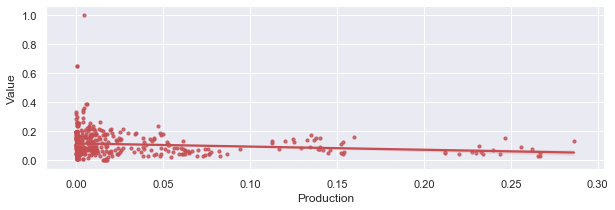

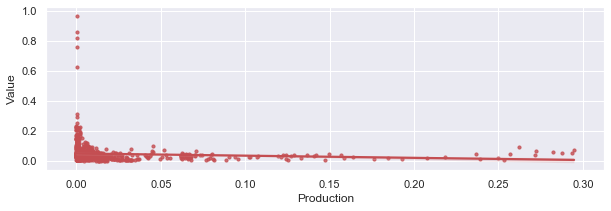

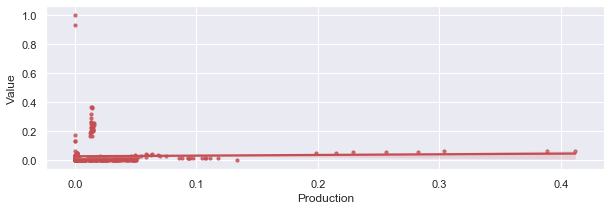

In [87]:
#Looking at coffee, green beans
def prodPriceCorr(item):
    greencoffeeprices = caffeinePrices.copy()[caffeinePrices['Item'] == item]
    greencoffeeproduction = caffeineProduction[caffeineProduction['Item'] == item]
    greencoffeeproduction = greencoffeeproduction.melt(id_vars=['Area'], value_vars=greencoffeeproduction.columns[3:],
                              var_name='Year', value_name='Production')
    greencoffeeprices.drop(columns=['Item', 'Item Code', 'continent'], inplace=True)
    greencoffeeprices['Year'] = greencoffeeprices['Year'].astype(str)
    greencoffeeproduction['Year'] = greencoffeeproduction['Year'].astype(str)
    
    greencoffeeproduction[['Production']] = greencoffeeproduction[['Production']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))
    greencoffeeprices[['Value']] = greencoffeeprices[['Value']].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

    merged = greencoffeeproduction.merge(greencoffeeprices, on=['Area', 'Year'])
    merged.sort_values(by='Production')

    plt.figure(figsize=(10,3))
    sns.regplot(x='Production', y='Value', data=merged, color='r',scatter_kws={"s": 10})
    
caffeineItems = ['Cocoa, beans', 'Coffee, green', 'Tea']
for item in caffeineItems:
    prodPriceCorr(item)
    
    

4. In 1971 and other key dates in the growth of Starbucks, an international coffee beverage company. Were there any noticeable trends in global or regional coffee production near this time period?

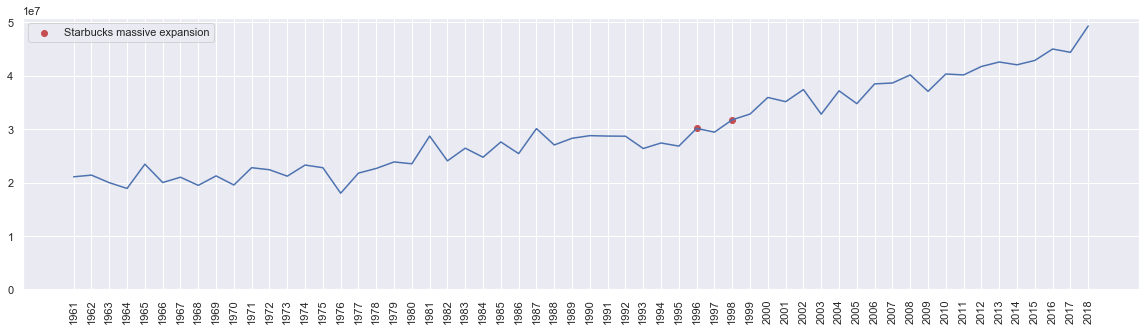

In [124]:
totalProd = caffeineProduction[caffeineProduction['Item'].str.contains('Coffee')].groupby('Item').sum().loc[:,'1961':].sum()
plot.set_ylim(ymin=0)

fig, axes = plt.subplots(1, 1, figsize=(20, 5))
axes.plot(totalProd)
plt.xticks(rotation=90)
plt.ylim(0)
axes.scatter(['1996', '1998'], [totalProd['1996'], totalProd['1998']], marker='o', color='r', label='Starbucks massive expansion')
axes.legend(loc='upper left')

From the starbucks website:
```    1998
    Extends the Starbucks brand into grocery channels across the U.S.
    Opens in underserved neighborhoods through joint-venture partnership with Magic Johnson.
    Launches Starbucks.com.
    Establishes the CUP Fund emergency financial assistance fund for partners.
    Opens stores in: England, Malaysia, New Zealand, Taiwan and Thailand.
    Total stores: 1,886
```
So this happened in 2003, hence the drop there. 
https://www.nytimes.com/2003/11/25/business/difficult-times-for-coffee-industry.html

In recent years, the climb has been phenomenal, which means that it is rather promising. Other economic sources also confirm this.

In [121]:
caffeineProduction

,Area,Item,Element,1961,1962,1963,1964,1965,1966,1967,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
605,American Samoa,"Cocoa, beans",Production,5.0,7.0,10.0,2.0,5.0,10.0,20.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
692,Angola,"Cocoa, beans",Production,400.0,400.0,300.0,300.0,400.0,300.0,400.0,...,336.0,354.0,372.0,400.0,410.0,419.0,436.0,455.0,472.0,454.0
695,Angola,"Coffee, green",Production,168600.0,185000.0,168300.0,198200.0,205000.0,225700.0,235200.0,...,11982.0,9951.0,10192.0,11740.0,12550.0,15009.0,15000.0,14709.0,15114.0,16079.0
1105,Argentina,Tea,Production,6486.0,5828.0,11205.0,12519.0,13838.0,18799.0,17400.0,...,71715.0,92417.0,92892.0,82813.0,80423.0,82628.0,82492.0,85015.0,81476.0,81981.0
2031,Azerbaijan,Tea,Production,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,447.0,545.0,534.0,568.0,568.0,474.0,579.0,1016.0,775.0,869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49687,Low Income Food Deficit Countries,Tea,Production,441370.0,435762.0,439077.0,472828.0,472121.0,502754.0,504853.0,...,1805114.0,1927830.0,2005571.0,2060367.0,2219315.0,2257928.0,2256566.0,2355088.0,2435712.0,2523217.0
49882,Net Food Importing Developing Countries,"Cocoa, beans",Production,198083.0,226192.0,237397.0,266764.0,224624.0,264240.0,260732.0,...,1532307.0,1637059.0,1924643.0,1789404.0,1729327.0,1968599.0,2139540.0,2032832.0,2471304.0,2411050.0
49888,Net Food Importing Developing Countries,"Coffee, green",Production,1197679.0,1201151.0,1329745.0,1492676.0,1362900.0,1519141.0,1426508.0,...,1740179.0,1870005.0,1894354.0,1953147.0,1915260.0,1890588.0,2027370.0,2098829.0,2224093.0,2384047.0
49968,Net Food Importing Developing Countries,Kola nuts,Production,42500.0,42500.0,42500.0,42500.0,42500.0,45500.0,45500.0,...,74328.0,74837.0,74846.0,70215.0,66407.0,65123.0,67810.0,64438.0,63354.0,62610.0
